정확성 테스트:
벡터: [1. 0. 0.] 와 [0. 1. 0.]
NumPy 결과: 90.00°
Numba 결과: 90.00°
차이: 0.0000000000°

벡터: [1. 0. 0.] 와 [1. 0. 0.]
NumPy 결과: 0.00°
Numba 결과: 0.00°
차이: 0.0000000000°

벡터: [1. 0. 0.] 와 [-1.  0.  0.]
NumPy 결과: 180.00°
Numba 결과: 180.00°
차이: 0.0000000000°

벡터: [1. 1. 0.] 와 [1. 0. 0.]
NumPy 결과: 45.00°
Numba 결과: 45.00°
차이: 0.0000000000°


성능 테스트 실행 중...


100%|██████████| 19/19 [00:01<00:00, 13.49it/s]


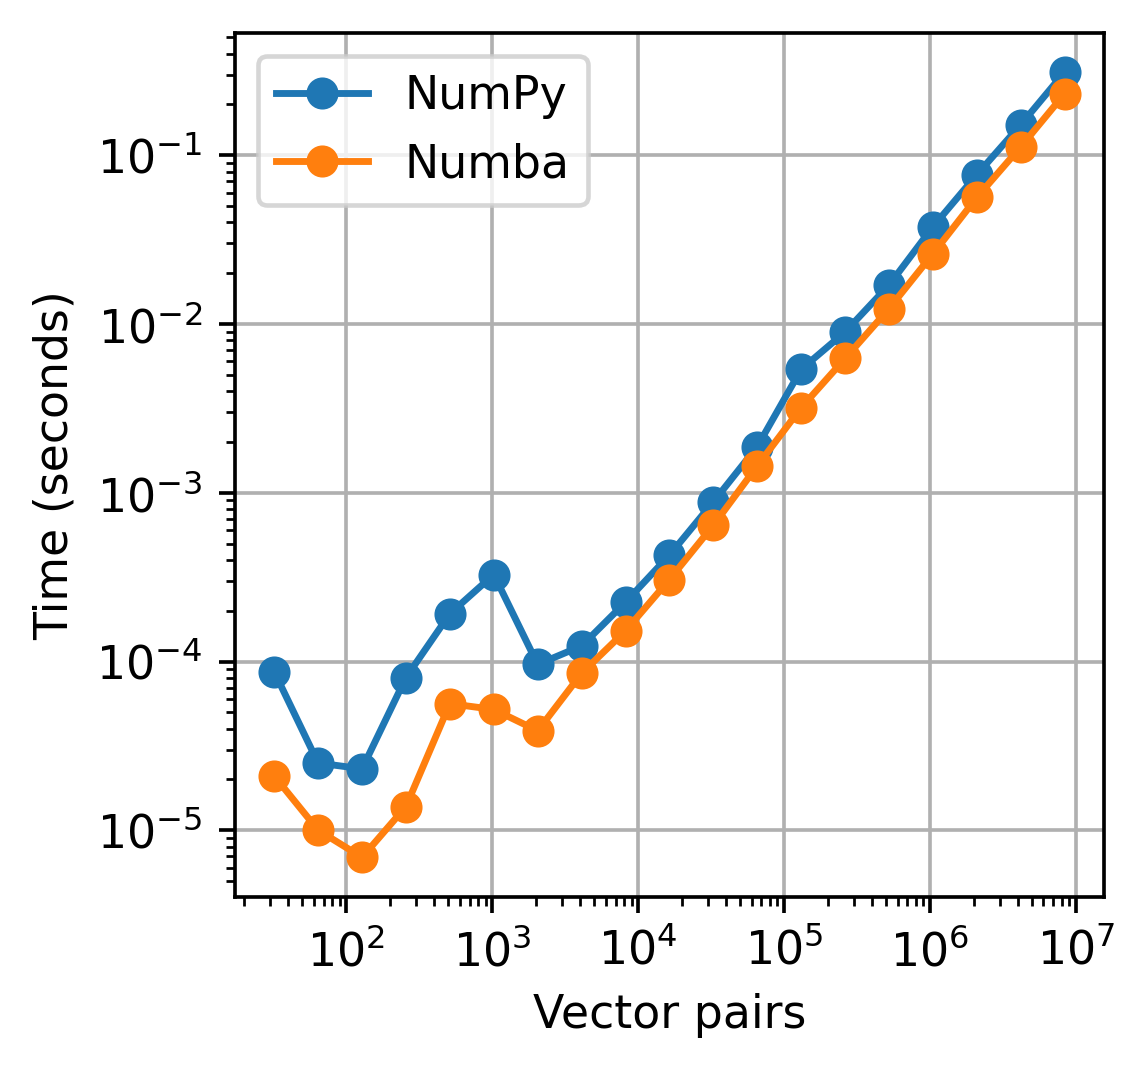

In [1]:
import numpy as np
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from mdbrew.space import calculate_angle


# 원본 함수
def calculate_angle_numpy(vec1, vec2, *, rad2deg=False):
    dot_product = np.sum(vec1 * vec2, axis=-1)
    norm_v1 = np.sqrt(np.sum(vec1 * vec1, axis=-1))
    norm_v2 = np.sqrt(np.sum(vec2 * vec2, axis=-1))
    angle = np.arccos(dot_product / (norm_v1 * norm_v2))
    if rad2deg:
        angle = np.rad2deg(angle)
    return angle


# 정확성 테스트
def test_accuracy():
    # 테스트 케이스들
    test_cases = [
        (np.array([1.0, 0.0, 0.0]), np.array([0.0, 1.0, 0.0])),  # 90도
        (np.array([1, 0, 0]), np.array([1, 0, 0])),  # 0도
        (np.array([1, 0, 0]), np.array([-1, 0, 0])),  # 180도
        (np.array([1, 1, 0]), np.array([1, 0, 0])),  # 45도
    ]

    print("정확성 테스트:")
    for vec1, vec2 in test_cases:
        vec1 = vec1.astype(float)
        vec2 = vec2.astype(float)
        angle_numpy = calculate_angle(vec1, vec2, rad2deg=True)
        angle_numba = calculate_angle_numpy(vec1, vec2, rad2deg=True)
        print(f"벡터: {vec1} 와 {vec2}")
        print(f"NumPy 결과: {angle_numpy:.2f}°")
        print(f"Numba 결과: {angle_numba:.2f}°")
        print(f"차이: {abs(angle_numpy - angle_numba):.10f}°\n")


# 성능 테스트
def test_performance():
    times = {"numpy": [], "numba": []}
    sizes = [2**i for i in range(5, 24)]  # 32 to 8M vectors

    # Numba 웜업
    warmup = np.random.random((100, 3))
    _ = calculate_angle(warmup, warmup)

    for size in tqdm(sizes):
        # 랜덤 벡터 생성
        vec1 = np.random.random((size, 3))
        vec2 = np.random.random((size, 3))

        # NumPy 버전 테스트
        start = time()
        _ = calculate_angle_numpy(vec1, vec2)
        times["numpy"].append(time() - start)

        # Numba 버전 테스트
        start = time()
        _ = calculate_angle(vec1, vec2)
        times["numba"].append(time() - start)

    return sizes, times


# 결과 시각화
def plot_results(sizes, times):
    plt.figure(figsize=(3.4, 3.4), dpi=330)
    plt.loglog(sizes, times["numpy"], "o-", label="NumPy")
    plt.loglog(sizes, times["numba"], "o-", label="Numba")
    plt.xlabel("Vector pairs")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.legend()
    plt.show()


# 정확성 테스트 실행
test_accuracy()

# 성능 테스트 실행
print("\n성능 테스트 실행 중...")
sizes, times = test_performance()

# # 결과 시각화
plot_results(sizes, times)